In [ ]:
# This notebook aims to predict if 2 people are going to produce a match

In [1]:
# read data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")

In [2]:
# vars in interest from the last notebook, including scores of 6 main attributes given by partner, and 17 lifestyle scores
input_vars1 = ['attr_o', 'sinc_o', 'intel_o','fun_o','amb_o','shar_o', 'sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']
# gender and order
input_vars2 = ['gender', 'ptn_order']
# How they value the 6 main attributes during signup stage (stage 1)
input_vars3 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
# How they value the 6 main attributes after the event (stage 2)
input_vars4 = ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']
# How they value the 6 main attributes after being sent their matches (stage 3)
input_vars5 = ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']
input_vars = input_vars1+input_vars2+input_vars3+input_vars4+input_vars5

In [10]:
# NaN percentage
NaNs = data.loc[:, input_vars].isnull().sum()
avg_percentage = sum(NaNs.values/data.shape[0])/len(input_vars)
avg_percentage

0.1021057365081304

In [11]:
# preprocessing, dealing with NaN cells
median_features = data.loc[:, input_vars].dropna().median()
features = data.loc[:, input_vars].fillna(median_features) # use median to fill the NaN values
match = data.match
features.shape

(8378, 43)

In [19]:
features.head(5)

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,sports,tvsports,exercise,dining,...,intel1_2,fun1_2,amb1_2,shar1_2,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3
0,6.0,8.0,8.0,8.0,8.0,6.0,9.0,2.0,8.0,9.0,...,13.89,22.22,11.11,16.67,15.0,20.0,20.0,15.0,15.0,15.0
1,7.0,8.0,10.0,7.0,7.0,5.0,9.0,2.0,8.0,9.0,...,13.89,22.22,11.11,16.67,15.0,20.0,20.0,15.0,15.0,15.0
2,10.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,8.0,9.0,...,13.89,22.22,11.11,16.67,15.0,20.0,20.0,15.0,15.0,15.0
3,7.0,8.0,9.0,8.0,9.0,8.0,9.0,2.0,8.0,9.0,...,13.89,22.22,11.11,16.67,15.0,20.0,20.0,15.0,15.0,15.0
4,8.0,7.0,9.0,6.0,9.0,7.0,9.0,2.0,8.0,9.0,...,13.89,22.22,11.11,16.67,15.0,20.0,20.0,15.0,15.0,15.0


In [13]:
# scale the feature matrix
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(features)  
features = scaler.transform(features) 

In [14]:
match.shape

(8378,)

In [15]:
# Let's see with these more features whether LogisticRegression can produce better result

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logreg = LogisticRegression(C=1)
scores = cross_val_score(logreg, features, match, cv=5, scoring='accuracy')
scores

/Users/sharonlyu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.82875895,  0.83711217,  0.82816229,  0.83880597,  0.82507463])

In [17]:
# No luck, let's use random forest
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, features, match, cv=5, n_jobs=4,
                         scoring='accuracy')
scores

array([ 0.82875895,  0.80906921,  0.8323389 ,  0.8238806 ,  0.83223881])

In [29]:
# Still no improvement, let's try GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                subsample=.8, max_features=.5)
scores = cross_val_score(gb, features, match, cv=5, n_jobs=4,
                         scoring='accuracy')
scores

array([ 0.8353222 ,  0.81443914,  0.82995227,  0.82268657,  0.82985075])

In [31]:
# let's try SVM
from sklearn import svm

In [32]:
svm_model = svm.SVC(C=1)
scores = cross_val_score(svm_model, features, match, cv = 5, scoring='accuracy')
scores

array([ 0.83293556,  0.80310263,  0.83472554,  0.81313433,  0.83522388])

In [33]:
# How about neural network?
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(mlp, features, match, cv = 5, scoring='accuracy')
scores

array([ 0.79594272,  0.80071599,  0.80906921,  0.79701493,  0.8161194 ])

In [ ]:
# So for this dataset, logistic regression is still the best choice. Including more features in this notebook 
# results in a slightly better model (83.88%) than the model in the last notebook with fewer features.
# 83.88% is also really close to the best result I saw on Kaggle (84%)

In [19]:
# ROC
from sklearn.cross_validation import train_test_split

features_train, features_test, match_train, match_test = train_test_split(
    features, match, test_size=0.20, random_state=0)

In [20]:
from sklearn.metrics import accuracy_score
logreg.fit(features_train, match_train)
match_predicted = logreg.predict(features_test)
accuracy_score(match_test, match_predicted)

0.83770883054892598

In [21]:
match_predicted_proba = logreg.predict_proba(features_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline
import matplotlib.pyplot as plt
def plot_roc_curve(match_test, match_predicted_proba):
    fpr, tpr, thresholds = roc_curve(match_test, match_predicted_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

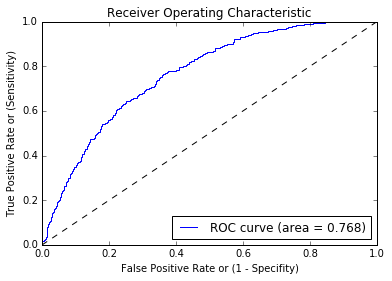

In [22]:
plot_roc_curve(match_test, match_predicted_proba)

In [23]:
# RMSE (although it's more used in regression not classification)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(match_test, match_predicted))
rms

0.40285378172616676

In [24]:
# Better see confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(match_test, match_predicted))

[[1376   31]
 [ 241   28]]


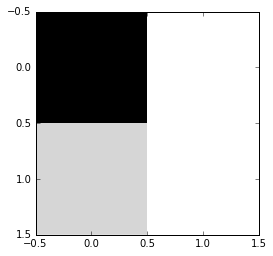

In [25]:
plt.imshow(confusion_matrix(match_test, match_predicted), cmap='binary', interpolation='None')
plt.show()

In [24]:
# Finally, let's see feature importance
logreg.coef_

array([[ 0.50841085, -0.01025091,  0.13124155,  0.48491104, -0.22320877,
         0.39344781, -0.01299045,  0.02344042, -0.10100303,  0.06243467,
        -0.18578483,  0.22964582,  0.00897051,  0.07778114,  0.06150719,
         0.09946272,  0.07821477,  0.0104232 , -0.14895775,  0.16570757,
        -0.04219713, -0.06287283,  0.01267764,  0.06259376, -0.09329795,
         0.09246937,  0.06062154,  0.14279025,  0.00325644, -0.11035157,
        -0.03882282, -0.11730723, -0.05872681,  0.0047442 ,  0.07827524,
        -0.01117797,  0.03084162, -0.09414218, -0.04406   , -0.16537448,
        -0.02408944,  0.15381958, -0.12970354]])

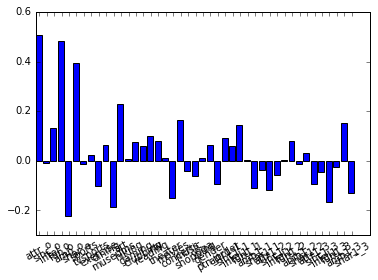

In [25]:
feature_names = input_vars
x = np.arange(len(feature_names))
plt.bar(x, logreg.coef_.ravel())
_ = plt.xticks(x + 0.5, feature_names, rotation=30)

In [29]:
# get a threshold to have a closer look
[(i,j) for (i,j) in zip(logreg.coef_.ravel(), feature_names) if abs(i) >= 0.2]

[(0.508410852787611, 'attr_o'),
 (0.48491104098084614, 'fun_o'),
 (-0.22320877326598587, 'amb_o'),
 (0.3934478104383089, 'shar_o'),
 (0.22964582045912404, 'art')]

In [ ]:
# Yes, similar as before, it's very important to be attractive, fun and to have shared interests. :D